In [1]:
from functions import MakeTime, MakeData, Fit, Spinup

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit



#t=MakeTime(data)[0]
#pc=MakeData(data)[0]
#tc=MakeData(data)[1]

In [2]:
data=np.loadtxt('Analysis/EPRData/02010954.dat')

data=np.transpose(data)

In [3]:
len(data)

3

Text(0.5, 0, 'Ticks')

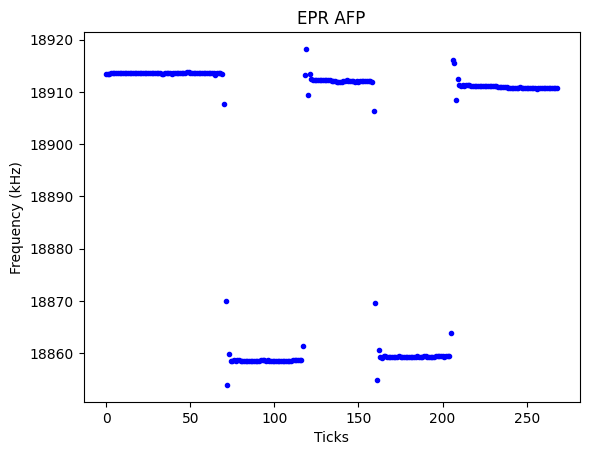

In [7]:
xaxis=np.arange(0,len(data[2]))

plt.plot(xaxis,data[1],'.',color='blue')
plt.title("EPR AFP")
plt.ylabel("Frequency (kHz)")
plt.xlabel("Ticks")

In [5]:
from statistics import mean

def ordered_cluster(data, max_diff):
    current_group = ()
    for item in data:
        test_group = current_group + (item, )
        test_group_mean = mean(test_group)
        if all((abs(test_group_mean - test_item) < max_diff for test_item in test_group)):
            current_group = test_group
        else:
            yield current_group
            current_group = (item, )
    if current_group:
        yield current_group

#data = [4.1, 4.05, 4.14, 4.01, 3.97, 4.52, 4.97, 5.02, 5.05, 5.2, 5.18, 3.66, 3.77, 3.59, 3.72]

y=list(ordered_cluster(data[1], 10))

In [6]:
len(y)

7

In [13]:
x=np.empty(0)
minimum=26
for i in range(0,len(y)):
    add=np.arange(0,len(y[i]),1)
    if len(add)> minimum:
        x=np.append(x,np.mean(y[i]))
     

In [14]:
x

array([18913.49768652, 18858.64806533, 18912.11424967, 18859.50748036,
       18911.08120625])

In [120]:
print('Front-End Shift: ',x[0]-x[1], '\n')

Front-End Shift:  16.07387006058343 



In [121]:
data[1]

array([19269.922363, 19302.05587 , 19286.693718, 19295.288339,
       19290.231458, 19293.212951, 19291.585838, 19292.497612,
       19292.093572, 19292.28891 , 19292.22028 , 19292.210957,
       19292.200387, 19292.109378, 19292.09365 , 19292.01294 ,
       19292.145593, 19292.095453, 19292.199634, 19292.316475,
       19292.383651, 19292.404953, 19292.482352, 19292.449901,
       19292.564193, 19292.511903, 19292.493727, 19292.4833  ,
       19292.525813, 19292.548413, 19292.540007, 19292.537345,
       19292.46616 , 19292.495924, 19292.498657, 19292.544126,
       19292.60159 , 19292.596349, 19292.615862, 19292.605796,
       19292.639217, 19292.505228, 19292.64857 , 19292.653632,
       19292.669899, 19292.728048, 19292.661134, 19292.724826,
       19292.737104, 19292.772119, 19292.664894, 19292.761036,
       19292.70358 , 19292.758202, 19292.713624, 19292.786051,
       19292.803452, 19292.759302, 19292.828486, 19292.720963,
       19292.760354, 19292.783752, 19292.84664 , 19292.

In [122]:
#find frequency shift higher than 50
#record past 10 indices
#jump ahead 10 indices
#find next frequency shift higher than 50

# EPR Shift Calculator

In [123]:
b=np.empty(0)
x=0
dumb=0
for i in range(0,len(data[2])):

    if abs(data[2][i])>50:
        for j in range(0,9):
            x+=data[1][i-j]
        x=x/10
        b=np.append(b,x)
      

In [124]:
b

array([17361.592936  , 19097.2202839 , 19271.10584849, 19288.31555075,
       19290.15483037, 19290.29592044, 19290.37297054, 19291.02831345,
       19289.39363175, 19287.70208327, 19285.82380443, 19278.83443934,
       19279.90406663, 19281.51170146])

# EPR Logic in Labview

In [125]:
#find frequency fluctuation higher than 300
#take frequency values from that index to previous fluctuation higher than 300

#if resulting array is at least 20 values, average them

freq=data[1]
fluck=data[2]
indices=np.empty(0)
previous=0
avgFreq=np.empty
for i in range(0,len(fluck)):
    if abs(fluck[i])>300:
        section=np.empty(0)
        indices=np.append(indices,i)
        section=data[1][previous:i]
        print(previous)
        #print(section)
        if(len(section)>20):
            avgFreq=np.append(avgFreq,np.mean(section))
            #print(previous)
        previous=i
        
tail=np.mean(data[1][previous:len(data[1])])
avgFreq=np.append(avgFreq,tail)
frontShift=avgFreq[1]-avgFreq[2]
tailShift=avgFreq[-1]-avgFreq[-2]
print(' Front Shift: ',np.round(frontShift,2),'\n', 'Tail Shift: ',np.round(tailShift,2),'\n')

0
1
2
3
4
76
 Front Shift:  15.99 
 Tail Shift:  15.55 



In [126]:
avgFreq[0]

<function numpy.empty>

In [127]:
avgFreq[1]

19292.544604194445

In [128]:
avgFreq[2]

19276.55612232609

In [129]:
avgFreq[3]

19292.10240461446